Sebuah maskapai penerbangan di indonesia mengalami penurunan peminat penerbangan yang cukup signifikan dari customer setia maupun baru dikarenakan faktor harga tiket yang terlalu tinggi atau pelayanan pada maskapai tersebut yang tidak tepat sasaran. hal ini dapat mengakibatkan kerugian keuangan pada maskapai tersebut.

oleh karna itu pihak maskapai perlu membuat suatu sistem kriteria terhadap customer. dengan adanya kriteria ini dapat menjadi acuan maskapai untuk mengelompokan customer untuk memberikan promo2 atau tindakan  yang tepat sesuai kebutuhan mereka agar customer merasa nyaman.

## Airline Customer Value Analysis Case

Code Description<br>
MEMBER_NO-b         : ID Member<br>
FFP_DATE            : Frequent Flyer Program Join Date<br>
FIRST_FLIGHT_DATE   : Tanggal Penerbangan pertama<br>
GENDER              : Jenis Kelamin<br>
FFP_TIER            : Tier dari Frequent Flyer Program<br>
WORK_CITY           : Kota Asal<br>
WORK_PROVINCE       : Provinsi Asal<br>
WORK_COUNTRY        : Negara Asal<br>
AGE                 : Umur Customer<br>
LOAD_TIME           : Tanggal data diambil <br>
FLIGHT_COUNT        : Jumlah penerbangan Customer<br>
BP_SUM              : Rencana Perjalanan<br>
SUM_YR_1            : Fare Revenue<br>
SUM_YR_2            : Votes Prices<br>
SEG_KM_SUM          : Total jarak(km) penerbangan yg sudah dilakukan<br>
LAST_FLIGHT_DATE    : Tanggal penerbangan terakhir<br>
LAST_TO_END         : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir<br>
AVG_INTERVAL        : Rata-rata jarak waktu<br>
MAX_INTERVAL        : Maksimal jarak waktu<br>
EXCHANGE_COUNT      : Jumlah penukaran<br>
avg_discount        : Rata rata discount yang didapat customer<br>
Points_Sum          : Jumlah poin yang didapat customer<br>
Point_NotFlight     : point yang tidak digunakan oleh members<br>


In [235]:
# Library import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
# Import Dataset
df = pd.read_csv('F:/JUPYTER/UNSUPERVISED/flight.csv', sep = ',')

1. Lakukan EDA pada dataset untuk mendapatkan pemahaman 
umum mengenai data dan memandu proses feature 
engineering (20 poin) <br>
a. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, 
bebas dari duplikat, dan berada di range value yang tepat

Apakah setiap feature memiliki tipe data yang tepat?

In [293]:
# Deskripsi singkat dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Terdapat beberapa feature dengan data type yang tidak sesuai, yaitu 'MEMBER_NO' yang harusnya bertipe object, FFP_DATE, FIRST_FLIGHT_DATE, dan LAST_FLIGHT_DATE harusnya bertipe datetime. Selanjutnya akan diganti tipe data pda feature tersebut.

In [238]:
# Changing MEMBER_NO data type
df['MEMBER_NO'] = df['MEMBER_NO'].astype('object')

In [239]:
# for i in ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']:
#     df[i] = pd.to_datetime(df[i])
# df['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'].info()

Terdapat kesalahan input data pada kolom, dimana tersapat input tanggal 29-2-2014 yang mana tanggal tersebut tidak ada atau melebihi tanggal di bulan 2/2014.

In [297]:
df[(df['FFP_DATE'] == '2014/2/29  0:00:00') | (df['FIRST_FLIGHT_DATE'] == '2014/2/29  0:00:00') | (df['LOAD_TIME'] == '2014/2/29  0:00:00') | (df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00')][['MEMBER_NO', 'FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE']]

,MEMBER_NO,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE
248,56497,6/17/2007,2014/2/29 0:00:00
447,17306,4/29/2010,2014/2/29 0:00:00
473,915,1/26/2007,2014/2/29 0:00:00
832,20336,8/6/2005,2014/2/29 0:00:00
1051,62884,4/21/2007,2014/2/29 0:00:00
...,...,...,...
61539,55995,7/10/2013,2014/2/29 0:00:00
61871,48742,7/26/2009,2014/2/29 0:00:00
61909,9190,4/20/2011,2014/2/29 0:00:00
62721,38776,3/13/2008,2014/2/29 0:00:00


In [298]:
df[(df['FFP_DATE'] == '2014/2/29  0:00:00') | (df['FIRST_FLIGHT_DATE'] == '2014/2/29  0:00:00') | (df['LOAD_TIME'] == '2014/2/29  0:00:00') | (df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


Terdapat 421 kolom yang salah input tanggal pada kolom LOAD_TIME, danLAST_FLIGHT_DATE. Sehingga akan diganti menjadi tanggal 28 Februari 2014.

In [299]:
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00','2014/3/01  0:00:00')


Akan dilanjutkan pergantian data type

In [300]:
for i in ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']:
    df[i] = pd.to_datetime(df[i])
df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   LOAD_TIME          62988 non-null  datetime64[ns]
 3   LAST_FLIGHT_DATE   62988 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.9 MB


Apakah terdapat missing value?

In [243]:
# Checking missing value
print('Dataset memiliki missing value sebanyak', df.isnull().sum().sum())

Dataset memiliki missing value sebanyak 6655


In [244]:
# Checking missing value
print('Missing value tersebar pada: \n\n', df.isnull().sum())

Missing value tersebar pada: 

 MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64


Pada feature GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, DAN SUM_YR_2 memiliki missing value. 
<br> Untuk kepentingan EDA, data hilang tersebut diberikan treatment sebagai berikut:<br>
* Untuk kolom GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY diimputasi dengan nilai 'not mentioned'
* Untuk kolom AGE, SUM_YR_1, dan SUM_YR_2 akan dihandle setelah melihat distribusinya pada nomor 1b.

In [245]:
for i in ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']:
    df[i] = df[i].fillna('not mentioned')

Apakah terdapat duplicated data?

In [246]:
# Checking duplicated data
print('Dataset memiliki duplicated data sebanyak: ',df.duplicated().sum())

Dataset memiliki duplicated data sebanyak:  0


b. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi 
setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

Statistik dan bentuk distribusi kolom Numerik

In [247]:
# Desrkripsi Statistik tiap feature
df.describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**Distribusi dari feature AGE, FLIGHT_COUNT, BP_SUM, SEG_KM_SUM, LAST_TO_END**

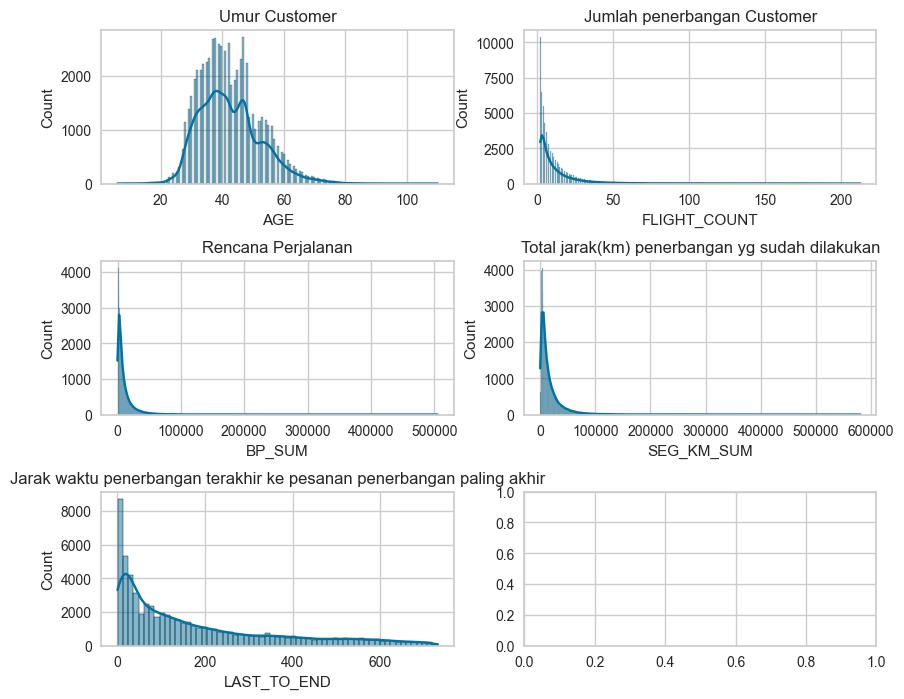

In [248]:
nums_plot1, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

sns.histplot(df['AGE'], kde = True, ax = axs[0][0])
axs[0][0].set_title('Umur Customer')

sns.histplot(df, x='FLIGHT_COUNT', kde = True, ax = axs[0][1])
axs[0][1].set_title('Jumlah penerbangan Customer')

sns.histplot(df, x='BP_SUM', kde = True, ax = axs[1][0])
axs[1][0].set_title('Rencana Perjalanan')

sns.histplot(df, x='SEG_KM_SUM', kde = True, ax = axs[1][1])
axs[1][1].set_title('Total jarak(km) penerbangan yg sudah dilakukan')

sns.histplot(df, x='LAST_TO_END', kde = True, ax = axs[2][0])
axs[2][0].set_title('Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir')

nums_plot1.subplots_adjust(wspace=0.2, hspace = 0.5)

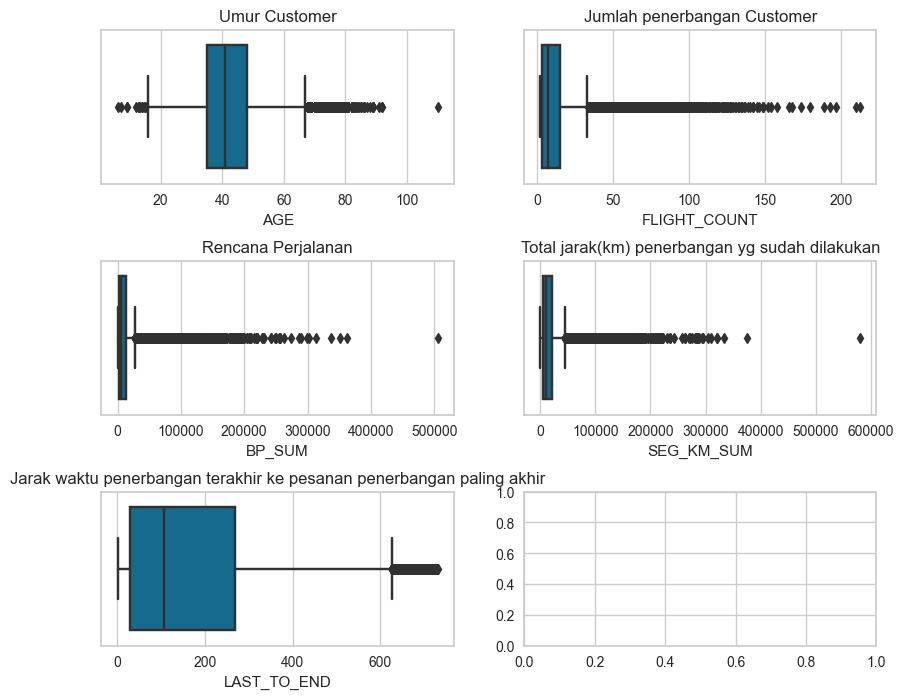

In [249]:
nums_boxplot1, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

sns.boxplot(x = df['AGE'], ax = axs[0][0])
axs[0][0].set_title('Umur Customer')

sns.boxplot(df, x='FLIGHT_COUNT', ax = axs[0][1])
axs[0][1].set_title('Jumlah penerbangan Customer')

sns.boxplot(df, x='BP_SUM', ax = axs[1][0])
axs[1][0].set_title('Rencana Perjalanan')

sns.boxplot(df, x='SEG_KM_SUM', ax = axs[1][1])
axs[1][1].set_title('Total jarak(km) penerbangan yg sudah dilakukan')

sns.boxplot(df, x='LAST_TO_END', ax = axs[2][0])
axs[2][0].set_title('Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir')

nums_boxplot1.subplots_adjust(wspace=0.2, hspace = 0.5)

Insights :
* Feature AGE masih memiliki missing value yang harus dihandle. Distribusi feature ini mendekati normal, tetapi terdapat outlier baik dari sisi kanan maupun kiri. Mungkin selanjutnya dapat dibersihkan outliernya dengan Z_Score karena outlier ektrim tidak terlalu banyak.
* Feature FLIGHT_COUNT (Jumlah penerbangan customer) memiliki distribusi positively skewed dengan long tail, tetapi hampir tidak ada nilai ekstrim.
* BP_SUM(Rencana Perjalanan) memiliki distribusi positively skewed dengan long tail, dan terdapat nilai outlier ekstrim. Selanjutnya nilai outlier ini dapat dihapus dengan menggunakan IQR karena lebih robust untuk menghapus outlier pada data long tailed
* SEG_KM_SUM(Total jarak perjalanan) memiliki distribusi positively skewed dengan long tail, dan terdapat nilai outlier ekstrim. Selanjutnya nilai outlier ini dapat dihapus dengan menggunakan IQR karena lebih robust untuk menghapus outlier pada data long tailed
* LAST_TO_END (Jarak waktu penerbangan terakhir ke pesanan terakhir) memiliki distribusi positively skewed, tetapi tidak terdapat nilai ekstrim, sehingga mungkin penanganan outlier tidak terlalu dibutuhkan pada feature ini.

**Bagaimana Distribusi dari AVG_INTERVAL, MAX_INTERVAL, SUM_YR_1, SUM_YR_2**

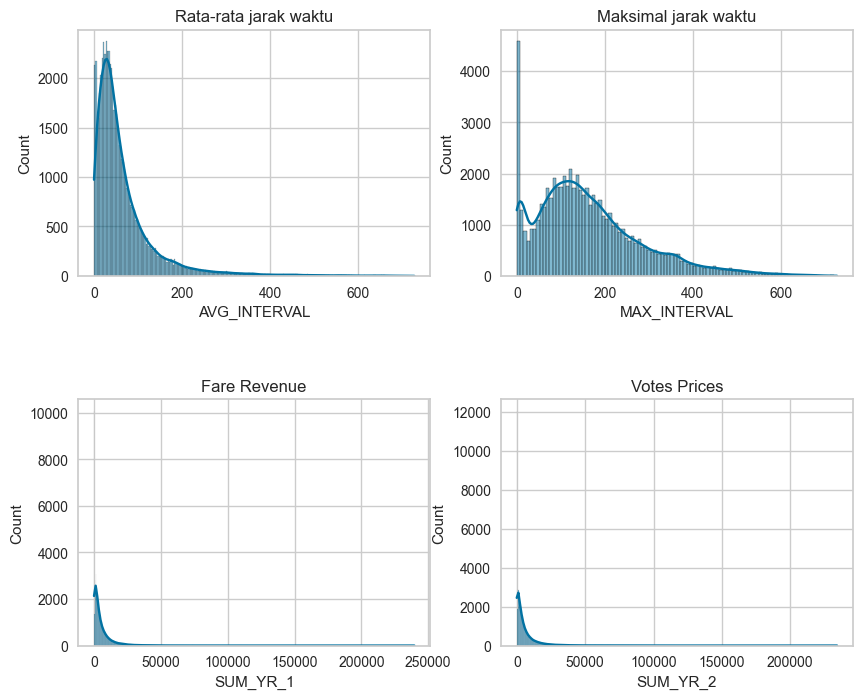

In [250]:
nums_plot2, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.histplot(df['AVG_INTERVAL'], kde = True, ax = axs[0][0])
axs[0][0].set_title('Rata-rata jarak waktu')

sns.histplot(df, x='MAX_INTERVAL', kde = True, ax = axs[0][1])
axs[0][1].set_title('Maksimal jarak waktu')

sns.histplot(df, x='SUM_YR_1', kde = True, ax = axs[1][0])
axs[1][0].set_title('Fare Revenue')

sns.histplot(df, x='SUM_YR_2', kde = True, ax = axs[1][1])
axs[1][1].set_title('Votes Prices')

nums_plot2.subplots_adjust(wspace=0.2, hspace = 0.5)

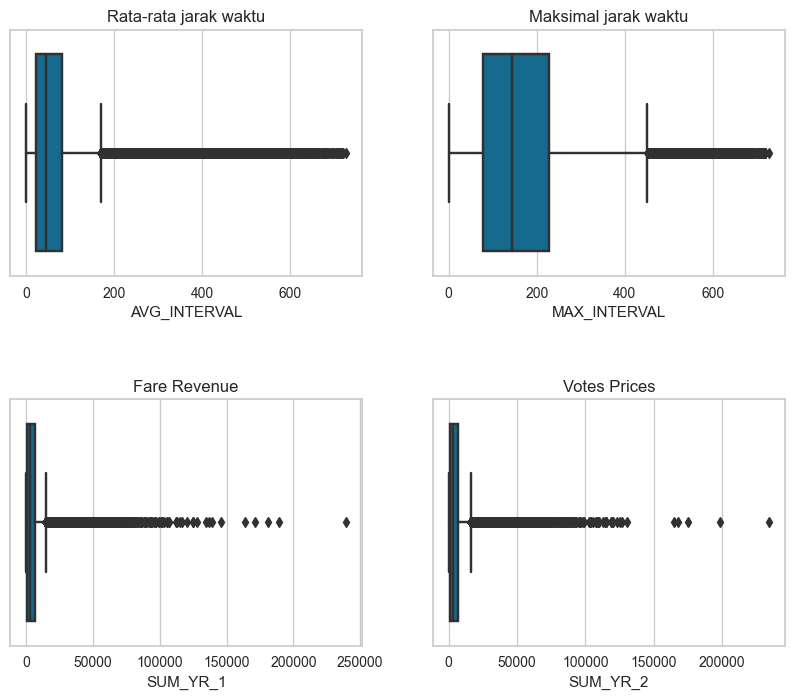

In [251]:
box_nums_plot2, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.boxplot(x = df['AVG_INTERVAL'], ax = axs[0][0])
axs[0][0].set_title('Rata-rata jarak waktu')

sns.boxplot(df, x='MAX_INTERVAL', ax = axs[0][1])
axs[0][1].set_title('Maksimal jarak waktu')

sns.boxplot(df, x='SUM_YR_1', ax = axs[1][0])
axs[1][0].set_title('Fare Revenue')

sns.boxplot(df, x='SUM_YR_2', ax = axs[1][1])
axs[1][1].set_title('Votes Prices')

box_nums_plot2.subplots_adjust(wspace=0.2, hspace = 0.5)

Insights :<br>
* Feature SUM_YR_1, dan SUM_YR_2 masih memiliki missing data yang perlu dihandle.<br>
* SUM_YR_1(Fare Revenue),dan SUM_YR_1 (Votes Prices) memiliki distribusi positively skewed dengan long tail, dan kedua feature tersebut memilliki nilai outlier yang ekstrim. Untuk membuat model, selanjutnya dapat dihadle outliernya dengan menggunakan IQR untuk menghapus outlier (IQR lebih robust untuk menghapus outlier pada data long tailed).<br>
* Feature AVG_INTERVAL (Rata-rata jarak waktu), MAX_INTERVAL(Maksimal jarak waktu) memiliki distribusi positivelu skewed, tetappi tidak ada nilai ekstrim yang harus dihandle.

**Bagaimana distribusi feature EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight**

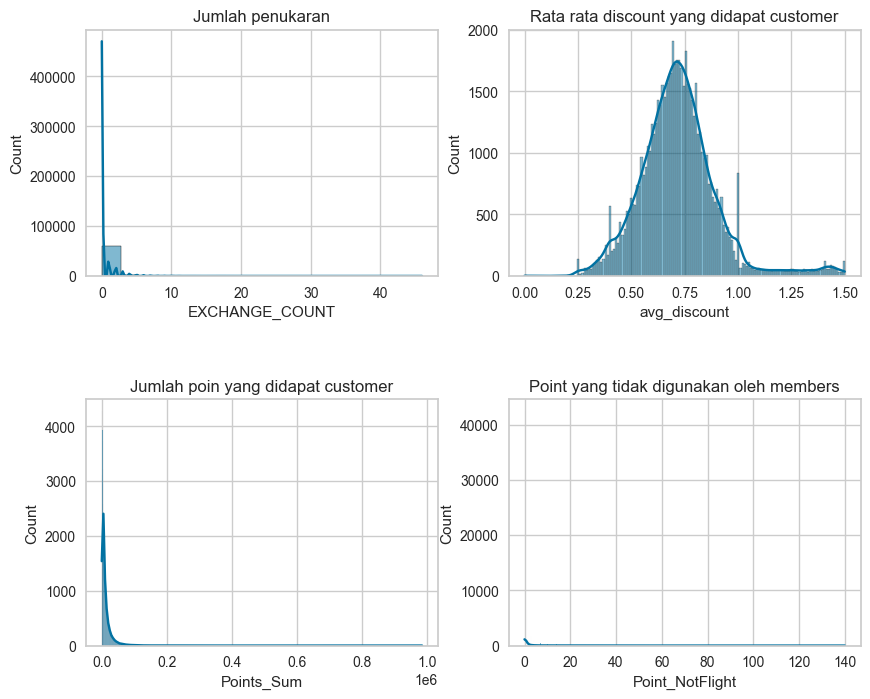

In [252]:
nums_plot3, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.histplot(df['EXCHANGE_COUNT'], kde = True, ax = axs[0][0])
axs[0][0].set_title('Jumlah penukaran')

sns.histplot(df, x='avg_discount', kde = True, ax = axs[0][1])
axs[0][1].set_title('Rata rata discount yang didapat customer')

sns.histplot(df, x='Points_Sum', kde = True, ax = axs[1][0])
axs[1][0].set_title('Jumlah poin yang didapat customer')

sns.histplot(df, x='Point_NotFlight', kde = True, ax = axs[1][1])
axs[1][1].set_title('Point yang tidak digunakan oleh members')

nums_plot3.subplots_adjust(wspace=0.2, hspace = 0.5)

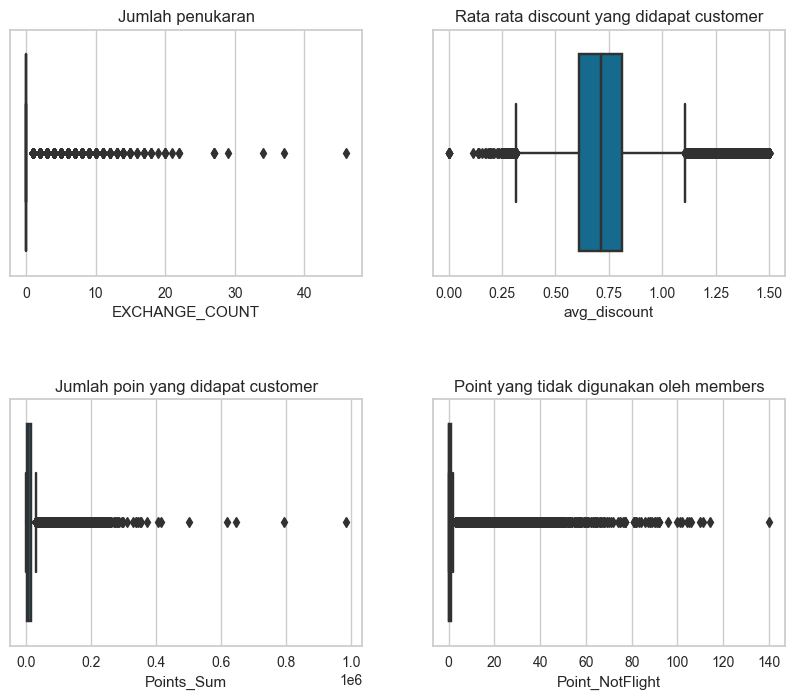

In [253]:
box_nums_plot3, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.boxplot(x = df['EXCHANGE_COUNT'], ax = axs[0][0])
axs[0][0].set_title('Jumlah penukaran')

sns.boxplot(df, x='avg_discount', ax = axs[0][1])
axs[0][1].set_title('Rata rata discount yang didapat customer')

sns.boxplot(df, x='Points_Sum', ax = axs[1][0])
axs[1][0].set_title('Jumlah poin yang didapat customer')

sns.boxplot(df, x='Point_NotFlight', ax = axs[1][1])
axs[1][1].set_title('Point yang tidak digunakan oleh members')

box_nums_plot3.subplots_adjust(wspace=0.2, hspace = 0.5)

Insights :<br>
* Pada Feature avg_discount terdapat nilai yang melebihi 1, dimana biasanya discount memiliki range 0-1. Perlu dipastikan apakah data sudah benar atau mungkin ada kesalahan. Untuk distribusinya, avg_discount berdistribusi mendekati normal dengan outlier yang berada pada sisi kanan dan kiri, sehingga selanjutnya disarankan untuk membuang outlier dapat dengan IQR atau dengan z-score.
* Uuntuk feature EXCHANGE_COUNT,avg_discount, Points_Sum, Point_NotFlight semuanya berdistribusi positively skewed dengan longtail dan outlier ekstrim. Selanjutnya perlu penanganan outlier ini, disarankan dengan menggunakan IQR untuk menghandle outllier karena lebih robust terhadap skewed data.

**Bagaimana frekuensi dari tiap kategori pada feature bertipe kategorikal?**

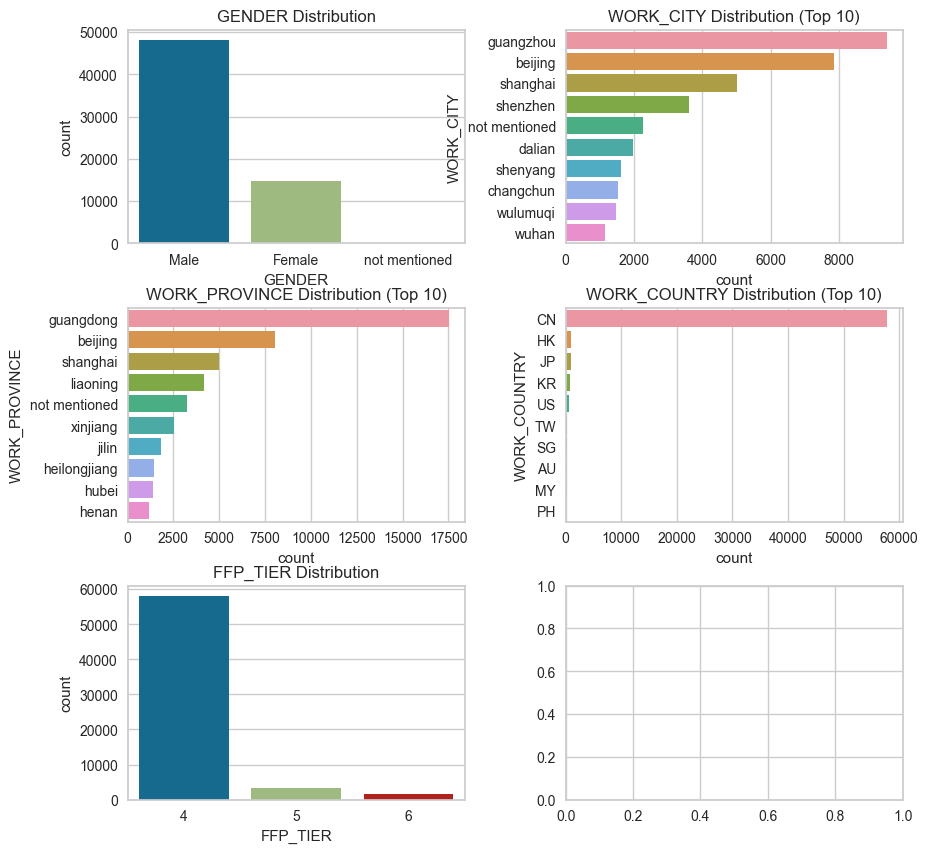

In [254]:
cats_plot, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

sns.countplot(df, x = 'GENDER', ax = axs[0][0])
axs[0][0].set_title('GENDER Distribution')

sns.barplot(df.groupby('WORK_CITY').agg(count = ('MEMBER_NO', 'nunique')).reset_index().sort_values('count', ascending = False).head(10), y = 'WORK_CITY', x = 'count', ax = axs[0][1])
axs[0][1].set_title('WORK_CITY Distribution (Top 10)')

sns.barplot(df.groupby('WORK_PROVINCE').agg(count = ('MEMBER_NO', 'nunique')).reset_index().sort_values('count', ascending = False).head(10), y = 'WORK_PROVINCE', x = 'count', ax = axs[1][0])
axs[1][0].set_title('WORK_PROVINCE Distribution (Top 10)')

sns.barplot(df.groupby('WORK_COUNTRY').agg(count = ('MEMBER_NO', 'nunique')).reset_index().sort_values('count', ascending = False).head(10), y = 'WORK_COUNTRY', x = 'count', ax = axs[1][1])
axs[1][1].set_title('WORK_COUNTRY Distribution (Top 10)')

sns.countplot(df, x = 'FFP_TIER', ax = axs[2][0])
axs[2][0].set_title('FFP_TIER Distribution')

cats_plot.subplots_adjust(wspace=0.3, hspace = 0.3)

Insights:
* Terdapat data dengan nilai kosong pada feature gender, perlu dipastikan apakah selanjutnya perlu dihapus atau diisi dengan nilai lain.
* Pada Feature WORK_CITY dan WORK_PROVINCE, data dengan missing value memiiki frekuensi yang berada pada 10 kategori teratas. Selanjutnya perlu dilakukan data handling dan menentukan apakah data perlu dihapus atau diisi dengan nilai lain.
* Pada feature FFP_TIER, frekuensi kategori 4 sangat tinggi dan terjadi ketimpangan dengan kategori lain
* Pada feature WORK_COUNTRY, negara CN memiliki frekuensi tertinggi dan terjadi ketimpangan dengan negara lain.

**Bagaimana distribusi dari feature bertipe datetime?**

In [255]:
df['LOAD_TIME'].unique()

array(['2014-03-31T00:00:00.000000000'], dtype='datetime64[ns]')

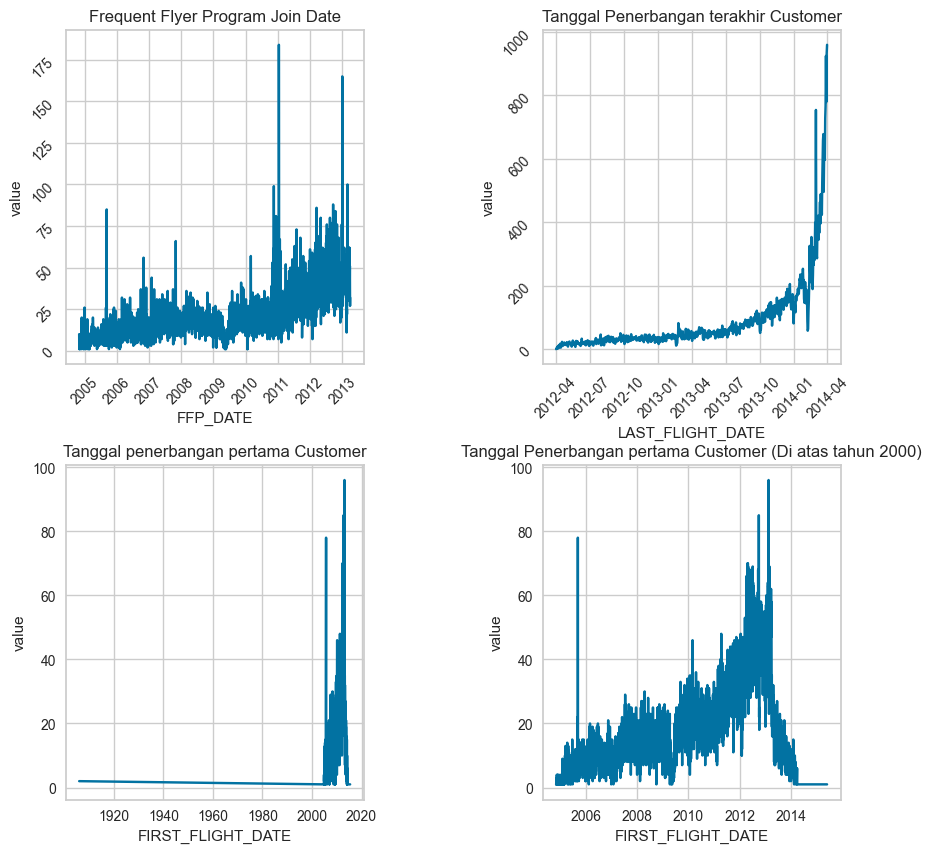

In [256]:
date_plot, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.lineplot(df.groupby('FFP_DATE').agg(value = ('MEMBER_NO', 'nunique')).reset_index(), x = 'FFP_DATE', y = 'value', ax = axs[0][0])
axs[0][0].set_title('Frequent Flyer Program Join Date')
axs[0][0].tick_params(labelrotation=45)

sns.lineplot(df.groupby('LAST_FLIGHT_DATE').agg(value = ('MEMBER_NO', 'nunique')).reset_index(), x = 'LAST_FLIGHT_DATE', y = 'value', ax = axs[0][1])
axs[0][1].set_title('Tanggal Penerbangan terakhir Customer')
axs[0][1].tick_params(labelrotation=45)

sns.lineplot(df.groupby('FIRST_FLIGHT_DATE').agg(value = ('MEMBER_NO', 'nunique')).reset_index(), x = 'FIRST_FLIGHT_DATE', y = 'value', ax = axs[1][0])
axs[1][0].set_title('Tanggal penerbangan pertama Customer')

sns.lineplot(df[df['FIRST_FLIGHT_DATE'].dt.year >= 2000].groupby('FIRST_FLIGHT_DATE').agg(value = ('MEMBER_NO', 'nunique')).reset_index(), x = 'FIRST_FLIGHT_DATE', y = 'value', ax = axs[1][1])
axs[1][1].set_title('Tanggal Penerbangan pertama Customer (Di atas tahun 2000)')

date_plot.subplots_adjust(wspace=0.6, hspace = 0.3)

Untuk mempermudah analisis data keseluruhan, data akan dikelompokkan berdasarkan tahunnya.

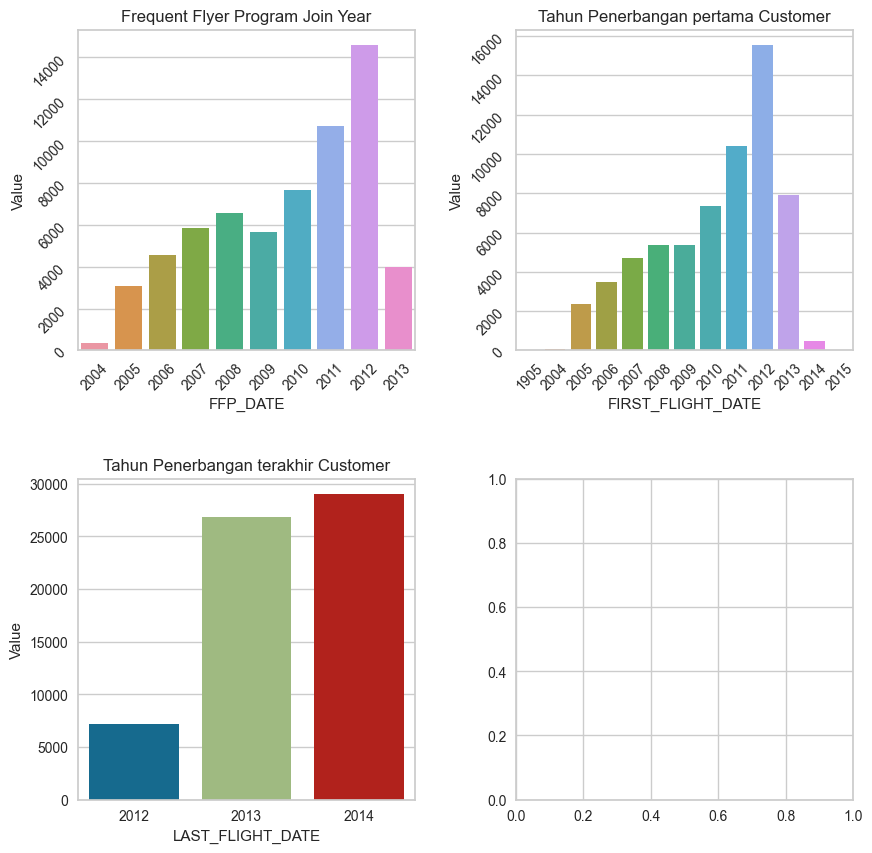

In [257]:
bar_date_plot, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.barplot(df.groupby(df['FFP_DATE'].dt.year).agg(Value = ('MEMBER_NO', 'nunique')).reset_index(),  y = 'Value', x = 'FFP_DATE', ax = axs[0][0])
axs[0][0].set_title('Frequent Flyer Program Join Year')
axs[0][0].tick_params(labelrotation=45)

sns.barplot(df.groupby(df['LAST_FLIGHT_DATE'].dt.year).agg(Value = ('MEMBER_NO', 'nunique')).reset_index(),  y = 'Value', x = 'LAST_FLIGHT_DATE', ax = axs[1][0])
axs[1][0].set_title('Tahun Penerbangan terakhir Customer')

sns.barplot(df.groupby(df['FIRST_FLIGHT_DATE'].dt.year).agg(Value = ('MEMBER_NO', 'nunique')).reset_index(),  y = 'Value', x = 'FIRST_FLIGHT_DATE', ax = axs[0][1])
axs[0][1].set_title('Tahun Penerbangan pertama Customer')
axs[0][1].tick_params(labelrotation=45)

bar_date_plot.subplots_adjust(wspace=0.3, hspace = 0.4)

Insights :
* Customer bergabung pada program FFP terbanyak pada rentang tahun 2011-2012
* Terdapat customer yang terdata melakukan penerbangan pertamanya pada tahun 1905, hal ini perlu dikonfirmasi ulang apakah data ini salah input atau sudah benar, dan harus dipastikan untuk dihandle dengan tepat.
* Customer melakukan penerbangan terakhirnya pada range tahun 2012 hingga 2014, dengan banyak penerbangan terakhir customer di tahun 2014.

c. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain

<Axes: >

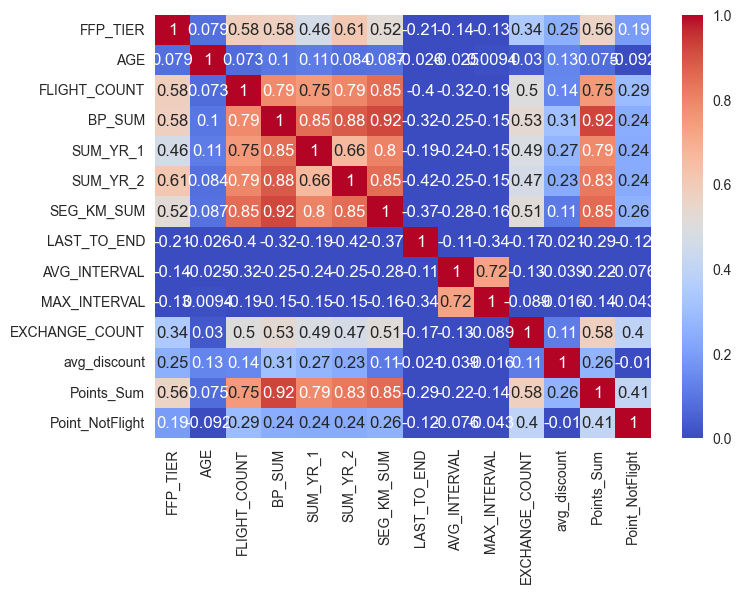

In [258]:
nums = df.select_dtypes([float,int]).columns
corr_matrix = df[nums].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot = True , vmin=0, vmax=1)

Terdapat beberapa feature yang berkorelasi tinggi dengan feature lainnya. Kemudian akan dilihat heatmap dari feature yang berkorelasi lebih dari 0.5 dengan feature lainnya.

C:\Users\una\AppData\Local\Temp\ipykernel_11784\716668825.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

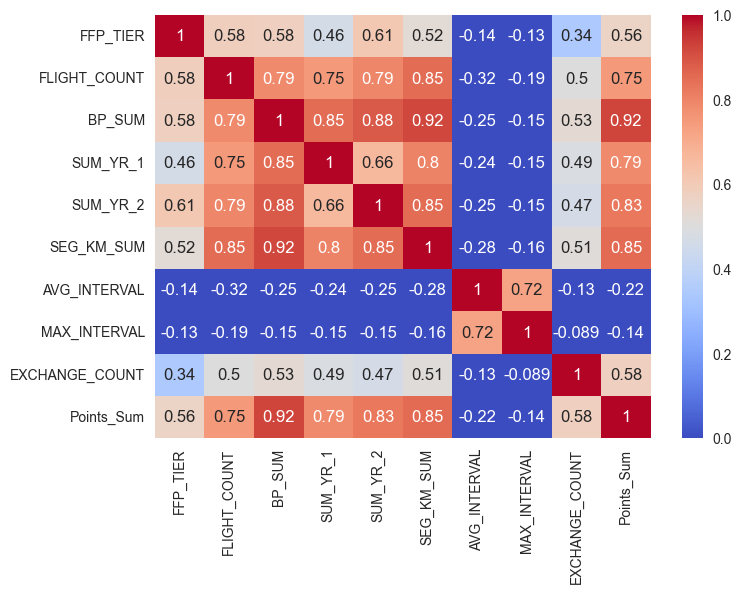

In [259]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Select columns with correlation greater than 0.5
high_corr_cols = corr_matrix[abs(corr_matrix) > 0.5].stack().reset_index().query('level_0 != level_1')['level_0'].unique()
high_corr_matrix = df[high_corr_cols].corr()
sns.heatmap(high_corr_matrix, cmap="coolwarm", annot = True, vmin=0, vmax=1)

Insight: <br>
Masih banyak feature yang berkorelasi kuat dengan feature lainnya. Kemungkinan feature tersebut redundan antara satu sama lain, sehingga tidak perlu dipakai semua saat membuat model.

**Additional Insight dari feature yang ada**

**Bagaimana jarak waktu penerbangan pertama dan terakhir customer?**

In [302]:
(df['LAST_FLIGHT_DATE'] - df['FIRST_FLIGHT_DATE']).dt.days.describe()

count    62988.000000
mean      1131.868943
std        900.258386
min       -467.000000
25%        408.000000
50%        915.000000
75%       1766.000000
max      39520.000000
dtype: float64

Ternyata terdapat customer dengan jarang penerbangan pertama dan terakhir yang negatif, hal ini mungkin terjadi karena adanya kesalahan pendataan. akan dicek terlebih dahulu apakah ada kesalahan nilai pada feature FIRST_FLIGHT_DATE, dan LAST_FLIGHT_DATE.

In [261]:
df[df['LAST_FLIGHT_DATE']<df['FIRST_FLIGHT_DATE']][['MEMBER_NO', 'FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE']]

,MEMBER_NO,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE
3293,12746,2015-03-09,2014-01-08
3733,17746,2015-02-15,2014-03-27
16393,56588,2015-05-30,2014-02-17
25240,62783,2014-07-14,2013-09-15
28231,45225,2015-04-03,2014-03-24
33198,9889,2014-09-11,2014-02-09


Ternyata ada beberapa customer dengan tanggal penerbangan terakhir yang lebih dahulu dibandingkan dengan tanggal penerbangan pertamanya, hal ini pasti merupakan kesalahan input data, sehingga akan dihapus baris-baris tersebut.

In [262]:
condition = df['LAST_FLIGHT_DATE'] < df['FIRST_FLIGHT_DATE']
filtered_df = df.loc[condition]

# drop baris yang tidak memenuhi kondisi
df = df.drop(filtered_df.index)
df['FIRST_LAST_DIFF'].describe()

count    62982.000000
mean      1132.010241
std        900.184491
min          0.000000
25%        408.000000
50%        915.000000
75%       1766.000000
max      39520.000000
Name: FIRST_LAST_DIFF, dtype: float64

Telah tidak ada data dengan customer dengan penerbangan terakhir yang lebih dahulu dibandingkan dengan penerbangan pertama.

<Axes: xlabel='FIRST_LAST_DIFF'>

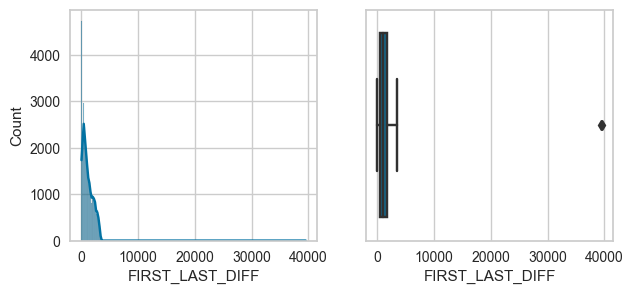

In [263]:
first_last_diff_plot, axs = plt.subplots(ncols=2, figsize=(7, 3))
sns.histplot(df['FIRST_LAST_DIFF'], kde = True, ax = axs[0])
sns.boxplot(x = df['FIRST_LAST_DIFF'],ax = axs[1])

Terdapat customer dengan jarak penerbangan pertama dan terakhir yang lebih dari 39000, atau lebih dari 100 tahun. Hal ini mengindikasikan adanya kesalahan data dan harus dihandle.

Text(0.5, 1.0, 'Dengan pembersihan data salah')

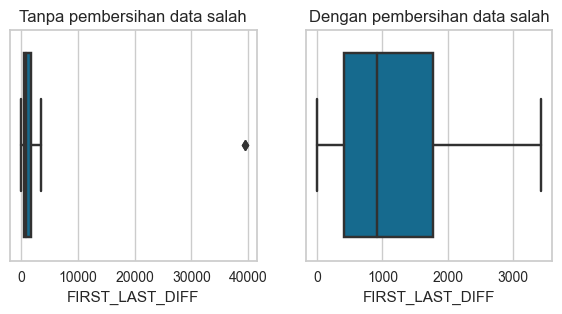

In [264]:
first_last_diff_plot2, axs = plt.subplots(ncols=2, figsize=(7, 3))
sns.boxplot(x = df['FIRST_LAST_DIFF'], ax = axs[0])
axs[0].set_title('Tanpa pembersihan data salah')
sns.boxplot(x = df[df['FIRST_FLIGHT_DATE'].dt.year>2000]['FIRST_LAST_DIFF'],ax = axs[1])
axs[1].set_title('Dengan pembersihan data salah')

Jarak penerbangan pertama dan terakhir customer mayoritas berada pada range 0-3500 hari (+- 9 tahun)

2. Pilih fitur-fitur yang menurut teman-teman masuk akal secara 
bisnis untuk digunakan sebagai fitur clustering. Lakukan 
feature engineering! (20 poin) <br>

a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur 
clustering. Tulis alasan teman-teman memilih fitur tersebut.

1. AGE : Umur Customer<br>
Feature umur customer dapat digunakan sebagai faktor dalam pengelompokan pelanggan dalam segmentasi berdasarkan umur. Pelanggan yang berada pada rentang usia yang sama, biasanya memiliki kebutuhan yang serupa, dan kecenderungan perilaku yang mirip pula. Dengan melakukan clustering berdasarkan umur, bisnis dapat menyesuaikan strategi marketing atau penawaran produk yang lebih efektif.

2. FFP_TIER : Tier dari Frequent Flyer Program<br>
Tier dari Frequent Flyer Program dapat menjadi faktor penting dalam pengelompokan pelanggan yang mengikuti program tersebut. Pelanggan yang berada pada tier yang sama, biasanya memiliki tingkat loyalitas yang tinggi terhadap maskapai penerbangan tersebut. Oleh karena itu, dengan melakukan clustering berdasarkan tier, bisnis dapat mengidentifikasi pelanggan yang memiliki potensi besar untuk menjadi pelanggan yang loyal, serta menyesuaikan penawaran dan reward yang tepat untuk mempertahankan loyalitas mereka.

3. FLIGHT_COUNT : Jumlah penerbangan Customer<br>
Feature jumlah penerbangan customer dapat digunakan untuk mengelompokkan pelanggan berdasarkan frekuensi penerbangan. Pelanggan dengan frekuensi penerbangan yang tinggi, dapat dikategorikan sebagai pelanggan yang sering melakukan perjalanan bisnis atau leisure, sehingga bisnis dapat menyesuaikan penawaran dan promo yang sesuai dengan kebutuhan mereka.

4. AVG_INTERVAL : Rata-rata jarak waktu<br>
Feature rata-rata jarak waktu antar penerbangan dapat digunakan untuk mengelompokkan pelanggan berdasarkan pola perjalanan mereka. Pelanggan dengan rata-rata jarak waktu yang pendek antar penerbangan, biasanya merupakan pelanggan yang melakukan perjalanan sering dan dalam jangka waktu yang singkat, sehingga bisnis dapat menyesuaikan penawaran dan promo yang sesuai dengan kebutuhan mereka.

5. avg_discount : Rata rata discount yang didapat customer<br>
Feature rata-rata diskon yang didapat pelanggan dapat menjadi faktor penting dalam pengelompokan pelanggan berdasarkan preferensi harga. Pelanggan dengan rata-rata diskon yang tinggi, biasanya merupakan pelanggan yang sensitif terhadap harga, sehingga bisnis dapat menyesuaikan penawaran dan promo yang sesuai dengan preferensi harga mereka.

6. FIRST_LAST_DIFF : Jarak penerbangan pertama dan penerbangan terakhir customer<br>
Feature ini dianggap penting karena dapat memberikan informasi penting seberapa lama pelanggan menggunakan jasa maskapai, dan feature ini dianggep memberikan informasi terkait loyalitas pelanggan.

Dengan memanfaatkan feature-feature tersebut dalam pengelompokan pelanggan, bisnis dapat melakukan segmentasi pelanggan yang lebih spesifik dan menyesuaikan strategi marketing atau penawaran produk yang lebih efektif untuk setiap kelompok pelanggan yang berbeda.

Akan dicek kembali korelasi antar feature untuk mengetahui apakah ada feature yang redundan satu sama lain.

<Axes: >

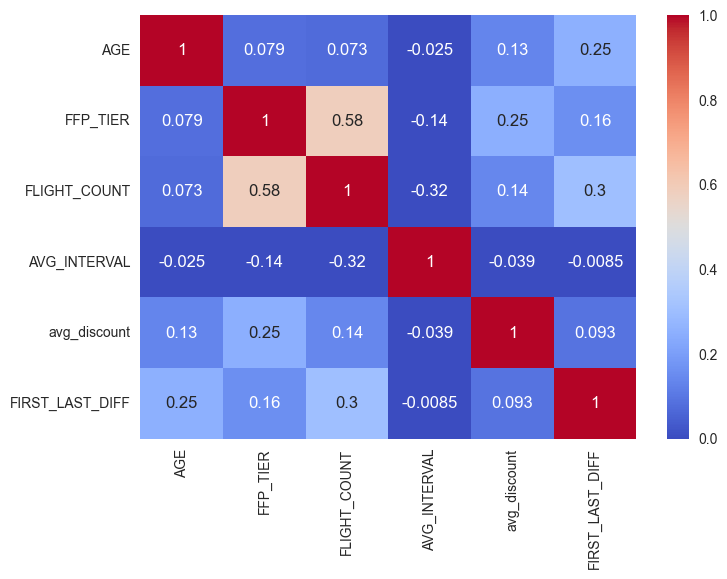

In [265]:
# Calculate the correlation matrix
vars = ['AGE', 'FFP_TIER', 'FLIGHT_COUNT', 'AVG_INTERVAL', 'avg_discount', 'FIRST_LAST_DIFF']
corr_matrix = df[vars].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot = True, vmin=0, vmax=1)

Dari 6 feature tersebut, diketahui telah tidak ada feature yang berkorelasi sangat tinggi antara satu sama lain.

b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).

Akan dicek terlebih dahulu apakah ada missing value pada feature yang dipilih

In [266]:
df[vars].isnull().sum()

AGE                420
FFP_TIER             0
FLIGHT_COUNT         0
AVG_INTERVAL         0
avg_discount         0
FIRST_LAST_DIFF      0
dtype: int64

Masih terdapat missing value pada feature AGE, sehingga untuk keperluan model akan dilakukan imputasi dengan nilai rata-rata karena feature AGE memiliki distribusi yang mendekati normal, dan nilai mean dianggap robust untuk imputasi missing value pada data yang berdistribusi mendekati normal.

In [267]:
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df[vars].isnull().sum()

AGE                0
FFP_TIER           0
FLIGHT_COUNT       0
AVG_INTERVAL       0
avg_discount       0
FIRST_LAST_DIFF    0
dtype: int64

Telah tidak ada missing value pada data, kemudian akan dilihat deskripsi statistik dari data untuk modeling untuk melihat apakah ada data yang masih tidak sesuai.

In [268]:
df[vars].describe()

,AGE,FFP_TIER,FLIGHT_COUNT,AVG_INTERVAL,avg_discount,FIRST_LAST_DIFF
count,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000
mean,42.476184,4.102156,11.838859,67.752337,0.721551,1132.010241
std,9.853285,0.373856,14.049415,77.520728,0.185411,900.184491
min,6.000000,4.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,4.000000,3.000000,23.370370,0.612001,408.000000
50%,41.000000,4.000000,7.000000,44.666667,0.711856,915.000000
75%,48.000000,4.000000,15.000000,82.000000,0.809472,1766.000000
max,110.000000,6.000000,213.000000,728.000000,1.500000,39520.000000


Selanjutnya akan dilakukan outlier handling. Akan dilihat terlebih dahulu distribusi dari feature yang akan digunakan.

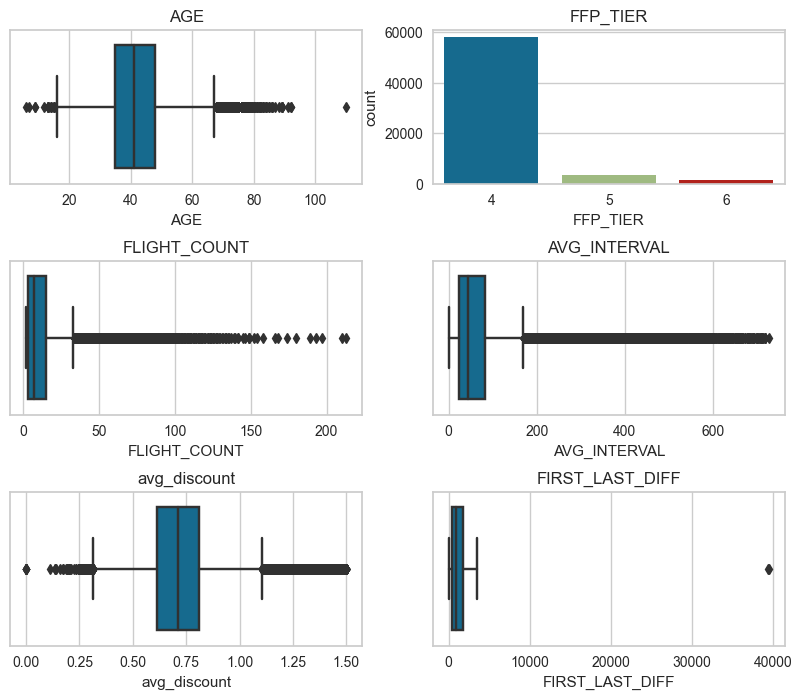

In [269]:
box_nums_plot3, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

sns.boxplot(x = df['AGE'], ax = axs[0][0])
axs[0][0].set_title('AGE')

sns.countplot(df, x = 'FFP_TIER', ax = axs[0][1])
axs[0][1].set_title('FFP_TIER')

sns.boxplot(df, x='FLIGHT_COUNT', ax = axs[1][0])
axs[1][0].set_title('FLIGHT_COUNT')

sns.boxplot(df, x='AVG_INTERVAL', ax = axs[1][1])
axs[1][1].set_title('AVG_INTERVAL')

sns.boxplot(df, x='avg_discount', ax = axs[2][0])
axs[2][0].set_title('avg_discount')

sns.boxplot(df, x='FIRST_LAST_DIFF', ax = axs[2][1])
axs[2][1].set_title('FIRST_LAST_DIFF')

box_nums_plot3.subplots_adjust(wspace=0.2, hspace = 0.5)

Terdapat outlier ekstrim pada feature AGE, avg_discount, FLIGHT_COUNT, dan FIRST_LAST_DIFF. 

Walaupun banyak data yang berada di luar upper bound berdasarkan IQR pada feature AVG_INTERVAL, data tersebut masih berada pada range atau skala yang tidak ekstrim, sehingga tidak perlu dihandle untuk modeling clustering.

Untuk outlier pada feature FIRST_LAST_DIFF, akan dilihat terlebih dahulu data customer yang berada pada outlier tersebut.

In [270]:
df[df['FIRST_LAST_DIFF'] >= 3900]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,FIRST_LAST_DIFF
4455,41193,2011-02-27,1905-12-31,Male,4,dalian,liaoning,CN,35.0,2014-03-31,...,52763,2014-03-14,18,18.051282,92,1,0.688062,33588,27,39520
30099,1999,2004-11-10,1905-12-31,Female,4,guangzhoushi,guangdongsheng,CN,37.0,2014-03-31,...,9592,2013-11-19,134,75.000000,178,1,0.775909,26192,38,39405


Dapat dikatakan bahwa data tersebut merupakan data yang salah karena tidak mungkin terdapat customer yang memiliki selisih penerbangan pertama dan penerbangan terakhir lebih dari 39000 hari atau kurang lebih 109 hari, padahal kedua customer tersebut masih berusia 35 dan 37 tahun. Sehingga data customer tersebut akan dihapus.

In [271]:
condition = df['FIRST_LAST_DIFF'] >= 3900
filtered_df = df.loc[condition]

# drop baris yang tidak memenuhi kondisi
df = df.drop(filtered_df.index)
df['FIRST_LAST_DIFF'].describe()

count    62980.000000
mean      1130.793014
std        873.898509
min          0.000000
25%        408.000000
50%        915.000000
75%       1766.000000
max       3431.000000
Name: FIRST_LAST_DIFF, dtype: float64

Selanjutnya data final yang akan digunakan untuk modeling akan disimpan dalam variable df_model

In [272]:
df_model = df[['AGE', 'FFP_TIER', 'FLIGHT_COUNT', 'AVG_INTERVAL', 'avg_discount', 'FIRST_LAST_DIFF']]

b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman 
pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).

Karena skala pada tiap feature belum seragam, akan dilakukan standarisasi terlebih dahulu.

In [273]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standarisasi
scaled_model = scaler.fit_transform(df_model)
scaled_model = pd.DataFrame(data = scaled_model, index = df_model.index, columns = df_model.columns)  

3. Lakukan clustering K-means! Temukan jumlah cluster yang 
menurut teman-teman optimal dan evaluasi cluster yang 
dihasilkan dengan visualisasi dan silhouette score (30 poin) <br>
Langkah-langkah: <br>
a. Temukan jumlah cluster yang optimal dengan menggunakan elbow method <br>

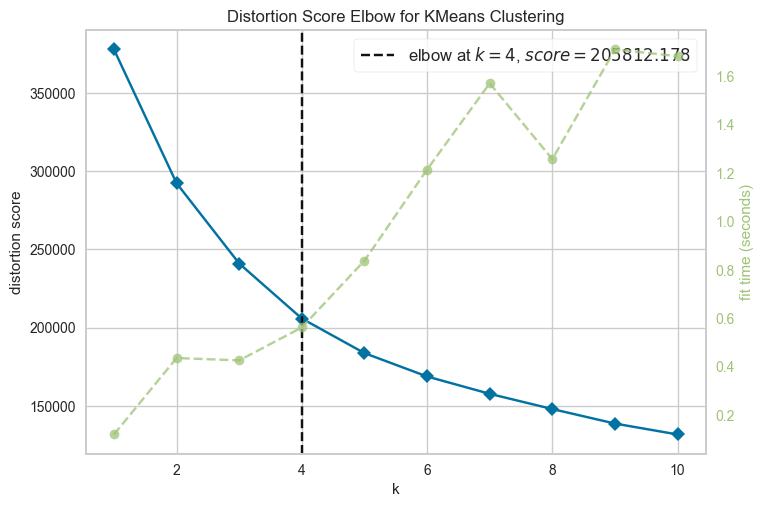

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [274]:
#WSS elbow test
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model =  KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(scaled_model)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Dari hasil elbow method, diperoleh angka 4 sebagai banyak cluster yang ideal untuk melakukan pengelompokan data.

b. Lakukan clustering menggunakan K-means

In [275]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, random_state = 0)
kmeans.fit(scaled_model)
df_model['CLUSTER'] = kmeans.labels_

C:\Users\una\AppData\Local\Temp\ipykernel_11784\4258961982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['CLUSTER'] = kmeans.labels_


c. Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA apabila diperlukan

<Axes: xlabel='pc1', ylabel='pc2'>

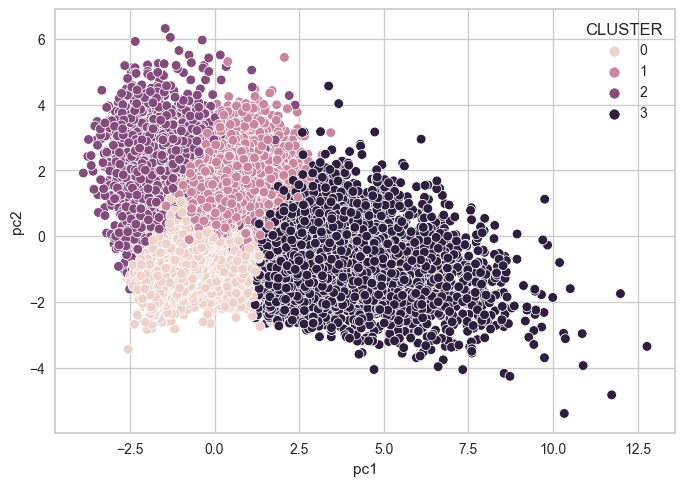

In [276]:
from sklearn.decomposition import PCA
pcs = PCA(n_components = 2).fit_transform(scaled_model)
pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
pdf['CLUSTER'] = kmeans.labels_
sns.scatterplot(pdf, x = 'pc1', y = 'pc2', hue = 'CLUSTER')

Terlihat dari visualisasi, data telah terpisah secara baik.

4. Interpretasi cluster yang dihasilkan secara bisnis dan berikan 
rekomendasi yang sesuai dengan cluster yang dihasilkan 
(30 poin) <br>
Langkah-langkah:<br>
a. Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik 
fitur dari setiap cluster

In [279]:
# Deskripsi Statistik Cluster 0
df_model[df_model['CLUSTER'] == 0].describe()

,AGE,FFP_TIER,FLIGHT_COUNT,AVG_INTERVAL,avg_discount,FIRST_LAST_DIFF,CLUSTER
count,31616.000000,31616.000000,31616.000000,31616.000000,31616.000000,31616.000000,31616.0
mean,37.603790,4.004555,7.954706,53.273031,0.685859,562.478144,0.0
std,7.279622,0.067335,7.104411,40.447146,0.163784,446.618136,0.0
min,7.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.0
25%,32.000000,4.000000,3.000000,23.000000,0.582932,198.000000,0.0
50%,37.000000,4.000000,6.000000,44.550505,0.689184,479.000000,0.0
75%,42.000000,4.000000,10.000000,75.250000,0.786603,843.000000,0.0
max,66.000000,5.000000,69.000000,192.000000,1.500000,3051.000000,0.0


In [280]:
# Deskripsi Statistik Cluster 1
df_model[df_model['CLUSTER'] == 1].describe()

,AGE,FFP_TIER,FLIGHT_COUNT,AVG_INTERVAL,avg_discount,FIRST_LAST_DIFF,CLUSTER
count,22238.000000,22238.000000,22238.000000,22238.000000,22238.000000,22238.000000,22238.0
mean,49.116435,4.002203,12.651183,54.505099,0.743410,1843.149924,1.0
std,9.242763,0.046890,10.319049,38.791903,0.180568,754.592244,0.0
min,24.000000,4.000000,2.000000,0.000000,0.000000,0.000000,1.0
25%,42.000000,4.000000,5.000000,27.077692,0.635605,1304.000000,1.0
50%,48.000000,4.000000,10.000000,44.000000,0.724937,1895.000000,1.0
75%,55.000000,4.000000,17.000000,72.888889,0.820874,2409.000000,1.0
max,110.000000,5.000000,69.000000,258.500000,1.500000,3422.000000,1.0


In [281]:
# Deskripsi Statistik Cluster 2
df_model[df_model['CLUSTER'] == 2].describe()

,AGE,FFP_TIER,FLIGHT_COUNT,AVG_INTERVAL,avg_discount,FIRST_LAST_DIFF,CLUSTER
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.0
mean,41.333159,4.006616,2.645448,288.015229,0.703356,1019.698836,2.0
std,9.596756,0.094108,0.745139,114.950050,0.197442,720.314375,0.0
min,6.000000,4.000000,2.000000,157.000000,0.190000,165.000000,2.0
25%,34.000000,4.000000,2.000000,203.000000,0.568713,443.000000,2.0
50%,40.000000,4.000000,2.000000,249.000000,0.698059,788.000000,2.0
75%,47.000000,4.000000,3.000000,336.000000,0.822283,1436.000000,2.0
max,88.000000,6.000000,5.000000,728.000000,1.500000,3332.000000,2.0


In [282]:
# Deskripsi Statistik Cluster 3
df_model[df_model['CLUSTER'] == 3].describe()

,AGE,FFP_TIER,FLIGHT_COUNT,AVG_INTERVAL,avg_discount,FIRST_LAST_DIFF,CLUSTER
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.0
mean,44.880255,5.309720,42.411765,22.844061,0.873785,1681.789374,3.0
std,8.853475,0.479882,25.852756,23.654567,0.233657,902.811685,0.0
min,14.000000,4.000000,2.000000,0.000000,0.355021,0.000000,3.0
25%,38.000000,5.000000,24.000000,11.801639,0.719363,878.000000,3.0
50%,45.000000,5.000000,39.000000,16.457143,0.794448,1593.000000,3.0
75%,50.000000,6.000000,56.000000,24.740385,0.931154,2446.000000,3.0
max,81.000000,6.000000,213.000000,416.000000,1.500000,3431.000000,3.0


b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing 
cluster

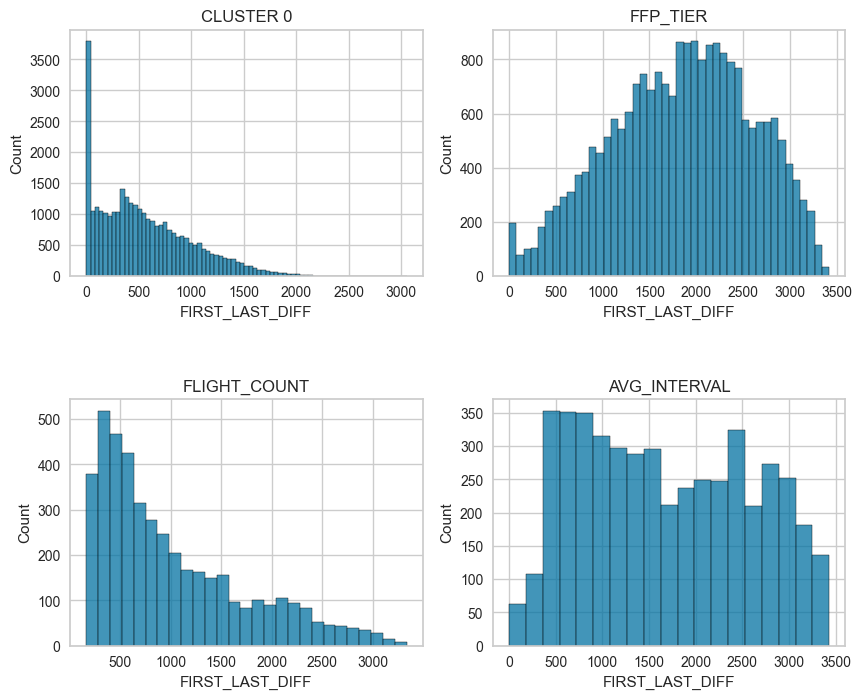

In [289]:
cluster_age, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.histplot(df_model[df_model['CLUSTER'] == 0], x = 'FIRST_LAST_DIFF', ax = axs[0][0])
axs[0][0].set_title('CLUSTER 0')

sns.histplot(df_model[df_model['CLUSTER'] == 1], x = 'FIRST_LAST_DIFF', ax = axs[0][1])
axs[0][1].set_title('FFP_TIER')

sns.histplot(df_model[df_model['CLUSTER'] == 2], x = 'FIRST_LAST_DIFF', ax = axs[1][0])
axs[1][0].set_title('FLIGHT_COUNT')

sns.histplot(df_model[df_model['CLUSTER'] == 3], x = 'FIRST_LAST_DIFF', ax = axs[1][1])
axs[1][1].set_title('AVG_INTERVAL')

cluster_age.subplots_adjust(wspace=0.2, hspace = 0.5)

c. Berdasarkan cluster tersebut, berikan 1-2 rn